Primeras 5 entradas:
{'gloss': 'book', 'video_path': '/kaggle/input/wlasl-processed/videos/69241.mp4', 'frame_start': 1, 'frame_end': -1, 'split': 'train'}
{'gloss': 'book', 'video_path': '/kaggle/input/wlasl2000-resized/wlasl-complete/videos/65225.mp4', 'frame_start': 1, 'frame_end': -1, 'split': 'train'}
{'gloss': 'book', 'video_path': '/kaggle/input/wlasl2000-resized/wlasl-complete/videos/68011.mp4', 'frame_start': 1, 'frame_end': -1, 'split': 'train'}
{'gloss': 'book', 'video_path': '/kaggle/input/wlasl2000-resized/wlasl-complete/videos/68208.mp4', 'frame_start': 1, 'frame_end': 60, 'split': 'train'}
{'gloss': 'book', 'video_path': '/kaggle/input/wlasl2000-resized/wlasl-complete/videos/68012.mp4', 'frame_start': 1, 'frame_end': -1, 'split': 'train'}

Total de entradas en el archivo: 21083

Cantidad de videos por split:
train: 14289
val: 3916
test: 2878

Cantidad de videos con la etiqueta 'book': 40
Total de palabras únicas (gloss): 2000
Algunas palabras únicas:
['friday', 'gray', '

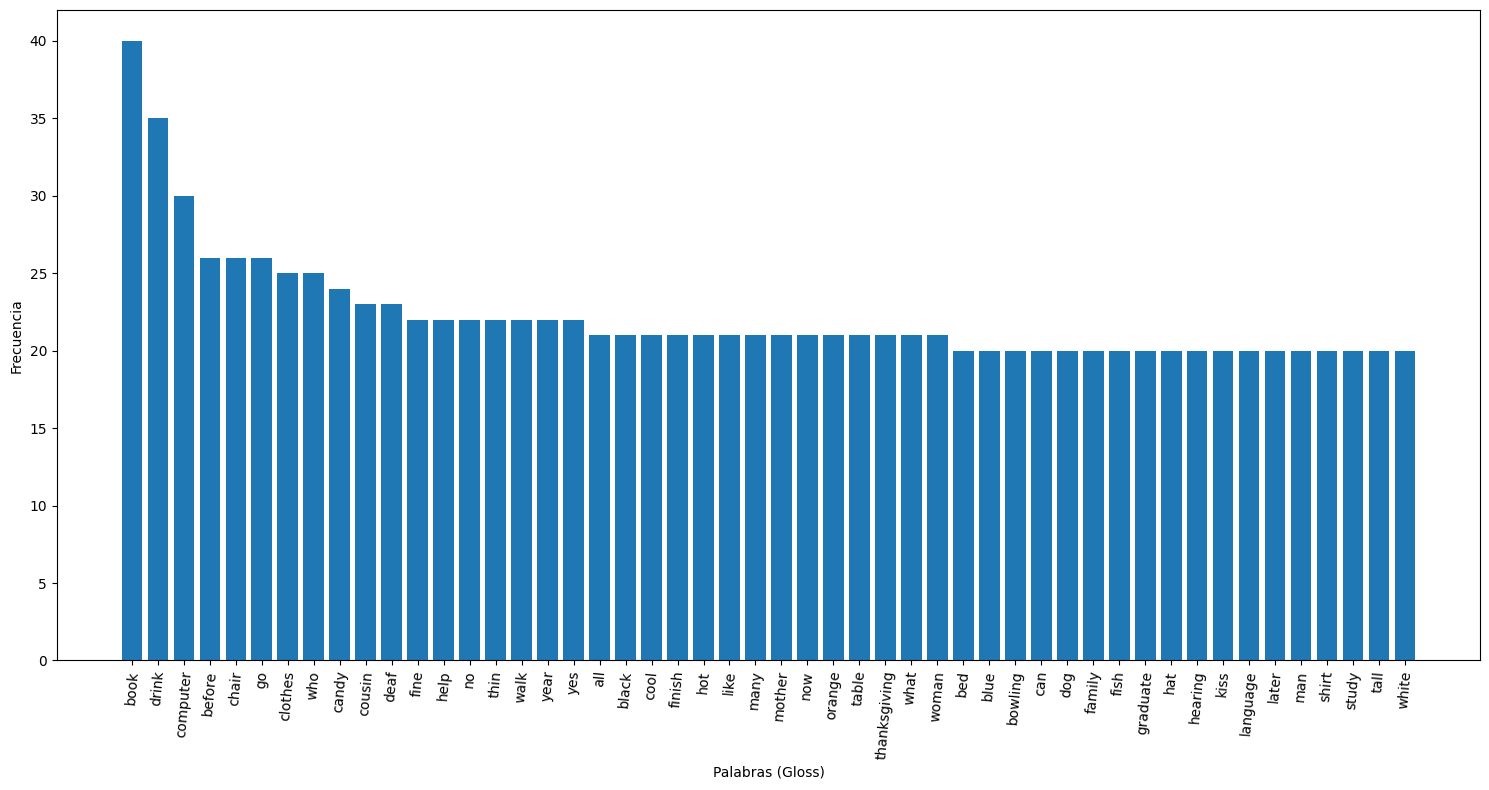

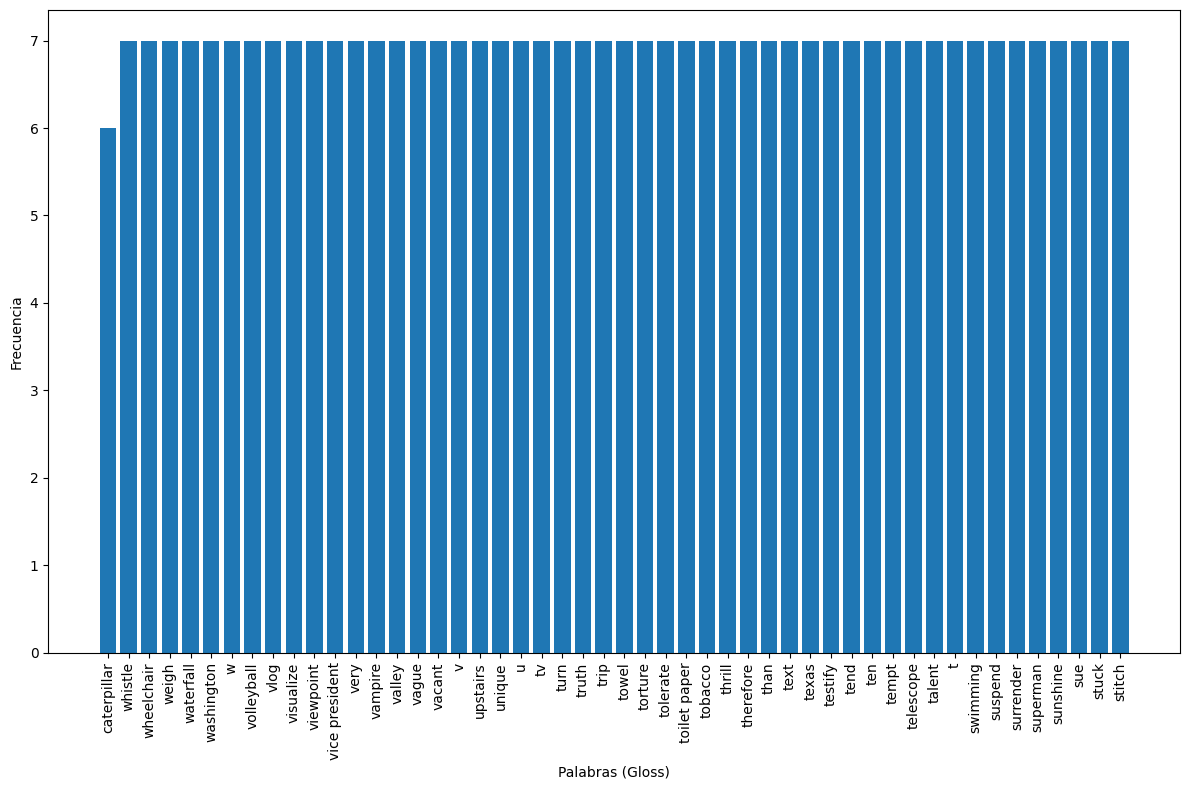

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Ruta del archivo
file_path = "data/dataset/mutemotion/archive/WLASL_parsed_data.json"

# Leer el archivo JSON
with open(file_path, 'r') as file:
    data = json.load(file)

# Inspeccionar las primeras 5 entradas
print("Primeras 5 entradas:")
for entry in data[:5]:
    print(entry)

# Contar el total de entradas
print(f"\nTotal de entradas en el archivo: {len(data)}")

# Contar la cantidad de videos por split (train, val, test)
split_counts = {"train": 0, "val": 0, "test": 0}
for entry in data:
    split_counts[entry["split"]] += 1

print("\nCantidad de videos por split:")
for split, count in split_counts.items():
    print(f"{split}: {count}")

# Ejemplo de entradas con una etiqueta específica (gloss)
target_gloss = "book"
filtered_entries = [entry for entry in data if entry["gloss"] == target_gloss]
print(f"\nCantidad de videos con la etiqueta '{target_gloss}': {len(filtered_entries)}")

unique_words = set()
for entry in data:
    unique_words.add(entry["gloss"])

# Mostrar el total de palabras únicas
print(f"Total de palabras únicas (gloss): {len(unique_words)}")

# Opcional: Mostrar las primeras 10 palabras únicas
print("Algunas palabras únicas:")
print(list(unique_words)[:10])

# Contar la frecuencia de las palabras (gloss)
gloss_counter = Counter(entry['gloss'] for entry in data)

# Obtener las 50 palabras más frecuentes
top_50_words = gloss_counter.most_common(50)

# Extraer palabras y frecuencias para graficar
words, counts = zip(*top_50_words)

# Plotear las 50 palabras más frecuentes
plt.figure(figsize=(15, 8))
plt.bar(words, counts)
plt.xticks(rotation=85)
plt.xlabel("Palabras (Gloss)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("morefreq.png", dpi=500, bbox_inches="tight")
plt.show()

# Obtener las palabras menos frecuentes (con frecuencia mínima)
least_frequent_words = gloss_counter.most_common()[:-51:-1]  # Últimas 50 palabras menos frecuentes

# Extraer palabras y frecuencias para graficar
words_least, counts_least = zip(*least_frequent_words)

# Plotear las palabras menos frecuentes
plt.figure(figsize=(12, 8))
plt.bar(words_least, counts_least)
plt.xticks(rotation=90)
plt.xlabel("Palabras (Gloss)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("lessfreq.png", dpi=500, bbox_inches="tight")
plt.show()


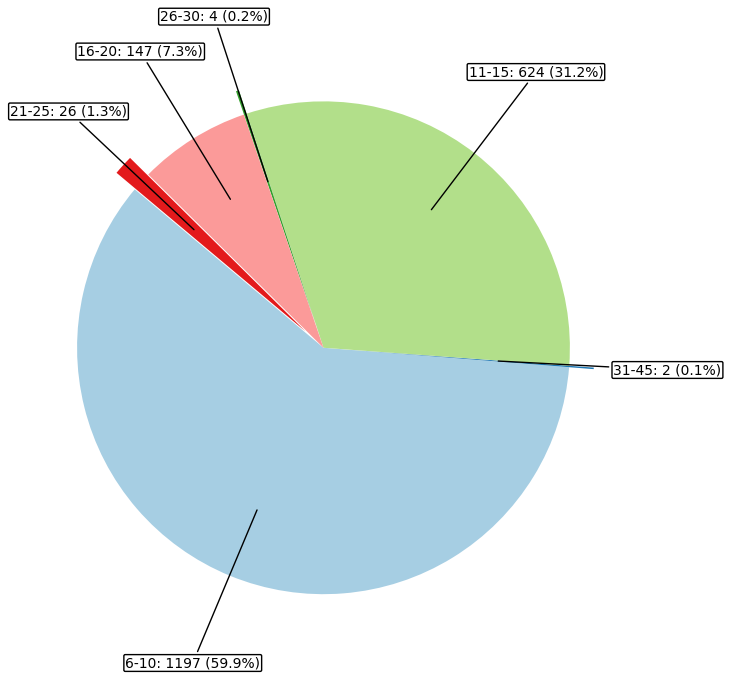

In [29]:
import json
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

gloss_counter = Counter(entry['gloss'] for entry in data)

# Definir los intervalos de frecuencia
intervals = {
    "1-5": 0,
    "6-10": 0,
    "11-15": 0,
    "16-20": 0,
    "21-25": 0,
    "26-30": 0,
    "31-45": 0
}

# Clasificar cada categoría en un intervalo
for gloss, count in gloss_counter.items():
    if 1 <= count <= 5:
        intervals["1-5"] += 1
    elif 6 <= count <= 10:
        intervals["6-10"] += 1
    elif 11 <= count <= 15:
        intervals["11-15"] += 1
    elif 16 <= count <= 20:
        intervals["16-20"] += 1
    elif 21 <= count <= 25:
        intervals["21-25"] += 1
    elif 26 <= count <= 30:
        intervals["26-30"] += 1
    elif 31 <= count <= 45:
        intervals["31-45"] += 1

# Filtrar intervalos con valores mayores a 0 para evitar segmentos vacíos en el pie chart
intervals = {k: v for k, v in intervals.items() if v > 0}

# Ordenar por tamaño alternando grandes y pequeños para evitar solapamiento
sorted_intervals = sorted(intervals.items(), key=lambda x: x[1], reverse=True)
reordered_intervals = []
left, right = 0, len(sorted_intervals) - 1
while left <= right:
    if left == right:
        reordered_intervals.append(sorted_intervals[left])
    else:
        reordered_intervals.append(sorted_intervals[left])
        reordered_intervals.append(sorted_intervals[right])
    left += 1
    right -= 1

# Extraer etiquetas y valores en el nuevo orden
labels, sizes = zip(*reordered_intervals)
# Calcular el total de elementos por split
split_counts = Counter(entry['split'] for entry in data)

# Extraer los nombres de los splits y sus respectivos conteos
splits = ["Train", "Validation", "Test"]
counts = list(split_counts.values())

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=splits, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.savefig("piedataset.png", dpi=500, bbox_inches="tight")
plt.show()
# Aplicar "explode" solo a las categorías más pequeñas para separarlas
explode = [0.1 if size / sum(sizes) < 0.05 else 0 for size in sizes]

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(10, 8))
wedges, _ = ax.pie(
    sizes,
    labels=None,  # Ocultamos etiquetas por defecto para personalizarlas con anotaciones
    startangle=140,
    colors=plt.cm.Paired.colors,
    pctdistance=0.85,
    explode=explode  # Destacar categorías pequeñas
)

# Añadir etiquetas con líneas de conexión
for wedge, label, size in zip(wedges, labels, sizes):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Ángulo medio del segmento
    x = np.cos(np.radians(angle))  # Posición en X
    y = np.sin(np.radians(angle))  # Posición en Y

    # Ajustar la posición de las líneas y etiquetas
    xy_start = (0.7 * x, 0.7 * y)  # Punto de inicio en el borde del pastel
    xy_end = (1.4 * x, 1.4 * y)  # Punto final para la etiqueta

    ax.annotate(
        f"{label}: {size} ({100 * size / sum(sizes):.1f}%)",
        xy=xy_start,  # Inicio de la flecha en el borde del pastel
        xytext=xy_end,  # Ubicación del texto
        arrowprops=dict(arrowstyle="-", linewidth=1.0, color="black"),
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.1", edgecolor="black", facecolor="white"),
    )

# Configuración del título
plt.savefig("pieinterval.png", dpi=500, bbox_inches="tight")
plt.show()

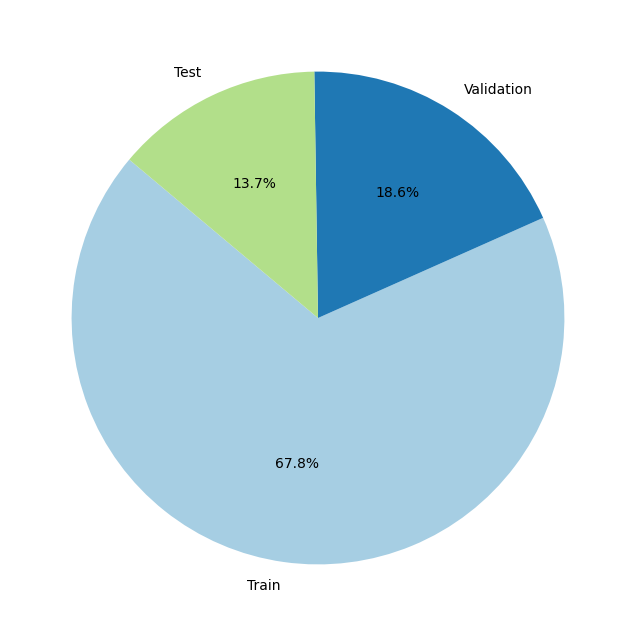

In [31]:
# Calcular el total de elementos por split
split_counts = Counter(entry['split'] for entry in data)

# Extraer los nombres de los splits y sus respectivos conteos
splits = ["Train", "Validation", "Test"]
counts = list(split_counts.values())

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=splits, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.savefig("piedataset.png", dpi=500, bbox_inches="tight")
plt.show()

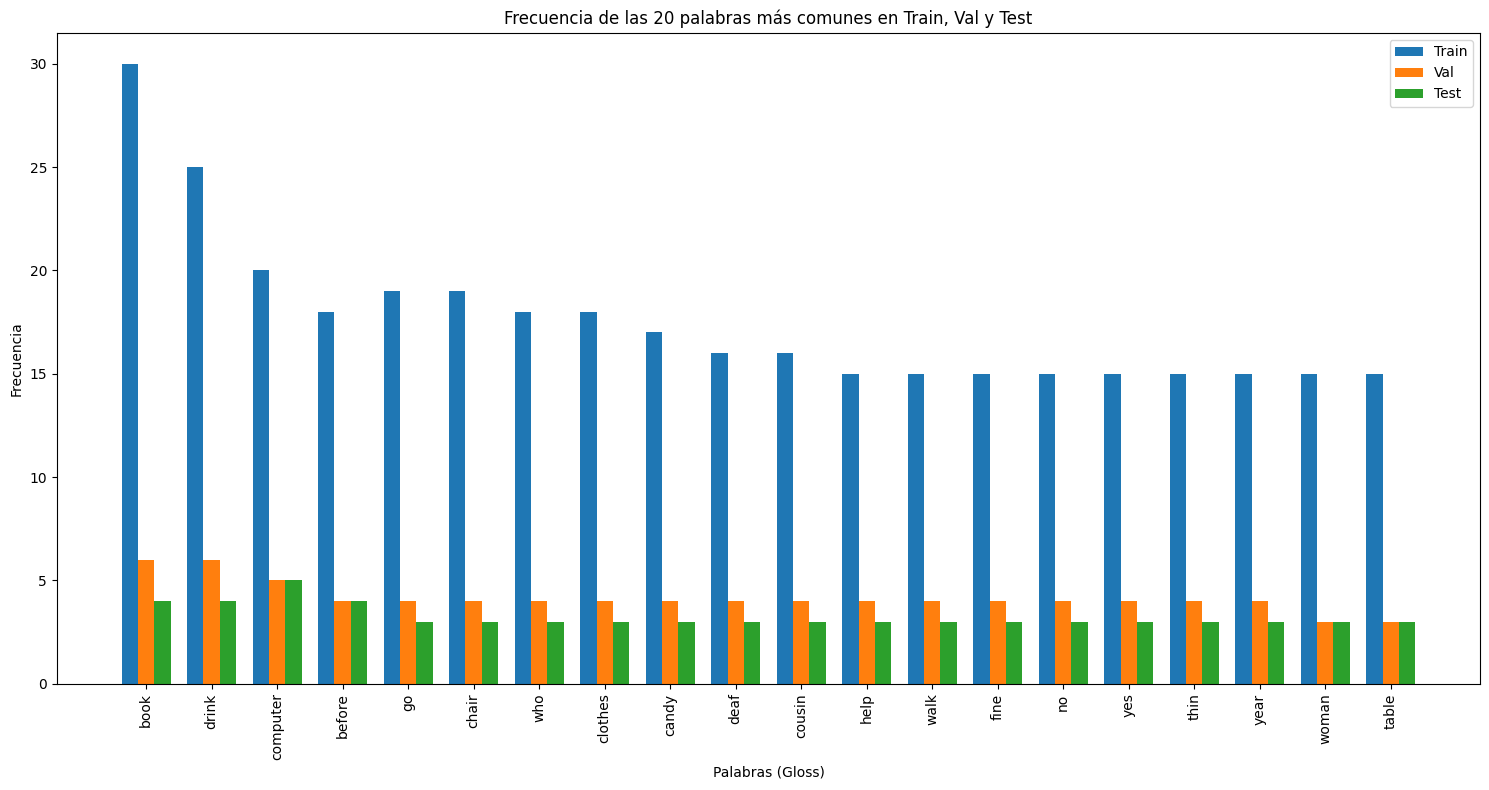

In [4]:
train_gloss = [entry['gloss'] for entry in data if entry['split'] == 'train']
val_gloss = [entry['gloss'] for entry in data if entry['split'] == 'val']
test_gloss = [entry['gloss'] for entry in data if entry['split'] == 'test']

# Contar las frecuencias
train_counter = Counter(train_gloss)
val_counter = Counter(val_gloss)
test_counter = Counter(test_gloss)


# Contar todas las palabras para los tres splits
combined_counter = Counter({
    gloss: train_counter[gloss] + val_counter[gloss] + test_counter[gloss]
    for gloss in set(train_counter.keys()).union(val_counter.keys(), test_counter.keys())
})

# Obtener las palabras más comunes globalmente
top_words = [word for word, _ in combined_counter.most_common(20)]

# Extraer las frecuencias de las palabras más comunes en cada split
train_freq = [train_counter[word] for word in top_words]
val_freq = [val_counter[word] for word in top_words]
test_freq = [test_counter[word] for word in top_words]

# Configurar gráfico
x = range(len(top_words))
bar_width = 0.25

plt.figure(figsize=(15, 8))

# Graficar histogramas superpuestos
plt.bar(x, train_freq, width=bar_width, label='Train', align='center')
plt.bar([pos + bar_width for pos in x], val_freq, width=bar_width, label='Val', align='center')
plt.bar([pos + 2 * bar_width for pos in x], test_freq, width=bar_width, label='Test', align='center')

# Configuración de etiquetas y leyenda
plt.xticks([pos + bar_width for pos in x], top_words, rotation=90)
plt.xlabel("Palabras (Gloss)")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de las 20 palabras más comunes en Train, Val y Test")
plt.legend()
plt.tight_layout()

plt.show()

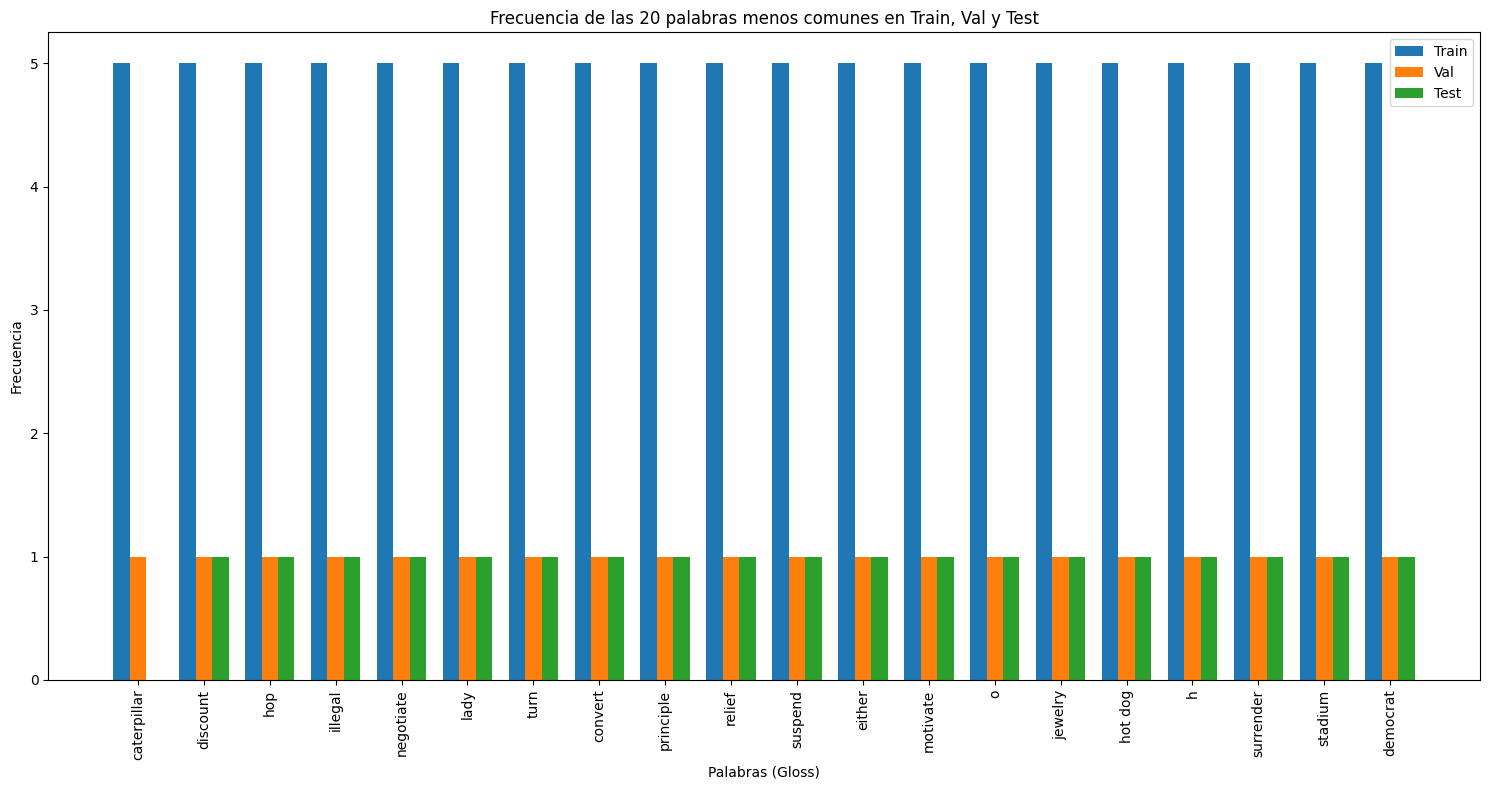

In [5]:
# Obtener las palabras menos comunes globalmente
least_common_words = [word for word, _ in combined_counter.most_common()[:-21:-1]]

# Extraer las frecuencias de las palabras menos comunes en cada split
train_least_freq = [train_counter[word] for word in least_common_words]
val_least_freq = [val_counter[word] for word in least_common_words]
test_least_freq = [test_counter[word] for word in least_common_words]

# Configurar gráfico
x = range(len(least_common_words))
bar_width = 0.25

plt.figure(figsize=(15, 8))

# Graficar histogramas superpuestos
plt.bar(x, train_least_freq, width=bar_width, label='Train', align='center')
plt.bar([pos + bar_width for pos in x], val_least_freq, width=bar_width, label='Val', align='center')
plt.bar([pos + 2 * bar_width for pos in x], test_least_freq, width=bar_width, label='Test', align='center')

# Configuración de etiquetas y leyenda
plt.xticks([pos + bar_width for pos in x], least_common_words, rotation=90)
plt.xlabel("Palabras (Gloss)")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de las 20 palabras menos comunes en Train, Val y Test")
plt.legend()
plt.tight_layout()

plt.show()

In [7]:
# Calcular el balance de cada palabra entre splits (train, val, test)
balance_data = []
for word in combined_counter.keys():
    train_freq = train_counter[word]
    val_freq = val_counter[word]
    test_freq = test_counter[word]
    total_freq = train_freq + val_freq + test_freq

    # Calcular porcentaje de ocurrencias en cada split
    train_percent = (train_freq / total_freq) * 100
    val_percent = (val_freq / total_freq) * 100
    test_percent = (test_freq / total_freq) * 100

    # Guardar los datos
    balance_data.append((word, train_percent, val_percent, test_percent, total_freq))

# Ordenar por el desbalance máximo entre splits
balance_data_sorted = sorted(balance_data, key=lambda x: max(x[1], x[2], x[3]) - min(x[1], x[2], x[3]), reverse=True)

# Mostrar las palabras más desbalanceadas (primeras 10)
top_unbalanced = balance_data_sorted[:20]
top_unbalanced

[('caterpillar', 83.33333333333334, 16.666666666666664, 0.0, 6),
 ('blue', 75.0, 15.0, 10.0, 20),
 ('wrong', 75.0, 15.0, 10.0, 20),
 ('hat', 75.0, 15.0, 10.0, 20),
 ('bowling', 75.0, 15.0, 10.0, 20),
 ('family', 75.0, 15.0, 10.0, 20),
 ('graduate', 75.0, 15.0, 10.0, 20),
 ('can', 75.0, 15.0, 10.0, 20),
 ('man', 75.0, 15.0, 10.0, 20),
 ('study', 75.0, 15.0, 10.0, 20),
 ('bed', 75.0, 15.0, 10.0, 20),
 ('white', 75.0, 15.0, 10.0, 20),
 ('hearing', 75.0, 15.0, 10.0, 20),
 ('book', 75.0, 15.0, 10.0, 40),
 ('forget', 73.68421052631578, 15.789473684210526, 10.526315789473683, 19),
 ('meet', 73.68421052631578, 15.789473684210526, 10.526315789473683, 19),
 ('time', 73.68421052631578, 15.789473684210526, 10.526315789473683, 19),
 ('want', 73.68421052631578, 15.789473684210526, 10.526315789473683, 19),
 ('play', 73.68421052631578, 15.789473684210526, 10.526315789473683, 19),
 ('bird', 73.68421052631578, 15.789473684210526, 10.526315789473683, 19)]

In [8]:
# Ordenar por el balance más equilibrado entre splits (menor diferencia entre máximos y mínimos porcentajes)
balance_data_sorted_equilibrated = sorted(balance_data, key=lambda x: max(x[1], x[2], x[3]) - min(x[1], x[2], x[3]))

# Mostrar las palabras más equilibradas (primeras 10)
top_balanced = balance_data_sorted_equilibrated[:10]
top_balanced

[('hawaii', 60.0, 20.0, 20.0, 10),
 ('wear', 60.0, 20.0, 20.0, 10),
 ('gather', 60.0, 20.0, 20.0, 10),
 ('herself', 60.0, 20.0, 20.0, 10),
 ('thing', 60.0, 20.0, 20.0, 10),
 ('spin', 60.0, 20.0, 20.0, 10),
 ('type', 60.0, 20.0, 20.0, 10),
 ('united states',
  57.14285714285714,
  28.57142857142857,
  14.285714285714285,
  7),
 ('far', 62.5, 18.75, 18.75, 16),
 ('soon', 62.5, 18.75, 18.75, 16)]

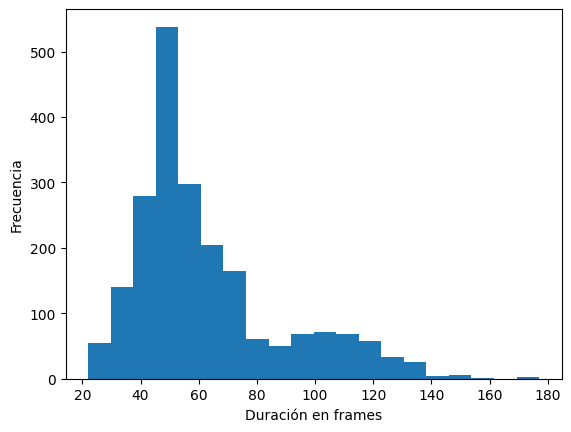

In [33]:
durations = [entry['frame_end'] - entry['frame_start'] for entry in data if entry['frame_end'] > 0]
plt.hist(durations, bins=20)
plt.xlabel("Duración en frames")
plt.ylabel("Frecuencia")
plt.savefig("durvideo.png", dpi=500, bbox_inches="tight")
plt.show()

Split train: 1442 muestras
Split val: 338 muestras
Split test: 258 muestras

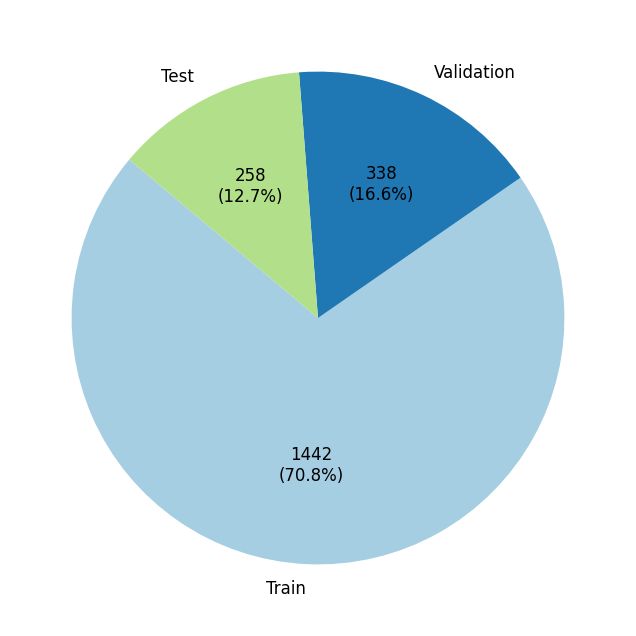

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Datos
splits = ["Train", "Validation", "Test"]
counts = [1442, 338, 258]

# Función para mostrar valores absolutos y porcentaje
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{absolute}\n({pct:.1f}%)"

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=splits, autopct=lambda pct: autopct_format(pct, counts), 
        colors=plt.cm.Paired.colors, startangle=140, textprops={'fontsize': 12})

# Guardar y mostrar
plt.savefig("piedataset_final.png", dpi=500, bbox_inches="tight")
plt.show()
